### This is Project is based on Churn Modelling

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [32]:
df=pd.read_csv("Churn_Modelling.csv")


In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [37]:
label_encoder= LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df= pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [49]:
features= ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
           'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
X=df[features]
y=df['Exited']

In [50]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


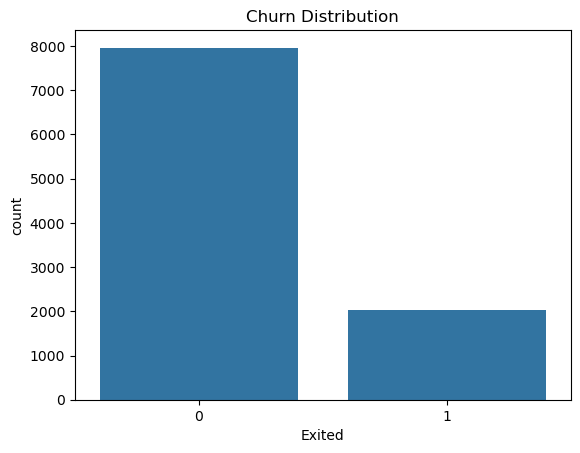

In [51]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [55]:
model =RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [62]:
conf_matrix= confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)


In [63]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


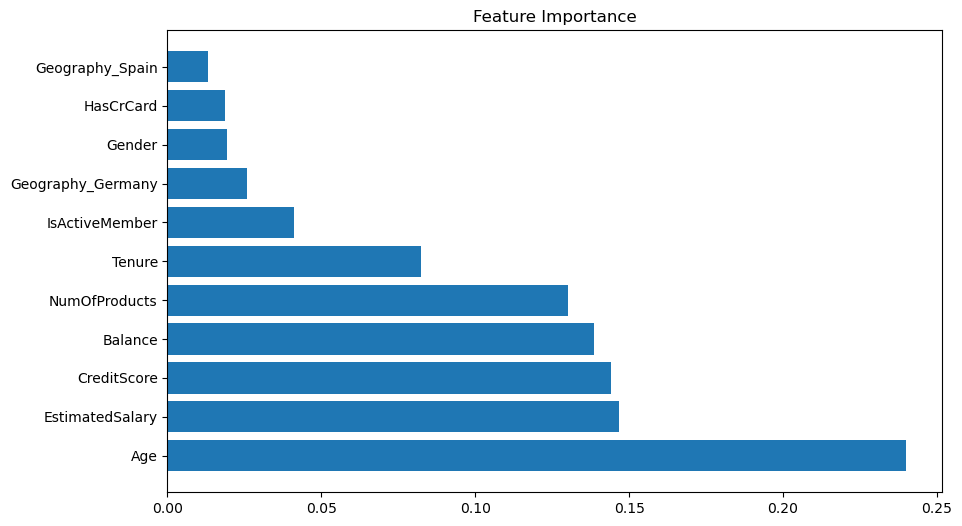

In [66]:
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]
names=[features[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()